In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
from sklearn.preprocessing import LabelEncoder;
from sklearn import preprocessing,tree
import seaborn as sns;
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectKBest,  f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import graphviz

In [2]:
%matplotlib inline

In [3]:
training_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [4]:
list(training_set)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
training_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_set.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
training_set.describe(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
training_set.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Coleff, Mr. Satio",male,347082,G6,S
freq,1,577,7,4,644


In [11]:
training_set[['Pclass','Survived']].groupby(by =['Pclass'], as_index=False).mean().sort_values(by=['Survived'], ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
training_set[['Sex','Survived']].groupby(by =['Sex'], as_index=False).mean().sort_values(by=['Survived'], ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
s = training_set.groupby(pd.cut(training_set['Age'], bins=20))['Survived'].value_counts()
print(s)

Age               Survived
(0.34, 4.399]     1           27
                  0           13
(4.399, 8.378]    1            9
                  0            5
(8.378, 12.357]   0           11
                  1            4
(12.357, 16.336]  0           16
                  1           15
(16.336, 20.315]  0           52
                  1           27
(20.315, 24.294]  0           62
                  1           36
(24.294, 28.273]  0           55
                  1           30
(28.273, 32.252]  0           49
                  1           35
(32.252, 36.231]  0           38
                  1           35
(36.231, 40.21]   0           28
                  1           17
(40.21, 44.189]   0           23
                  1           12
(44.189, 48.168]  0           23
                  1           12
(48.168, 52.147]  0           15
                  1           14
(52.147, 56.126]  0            9
                  1            7
(56.126, 60.105]  0            8
                

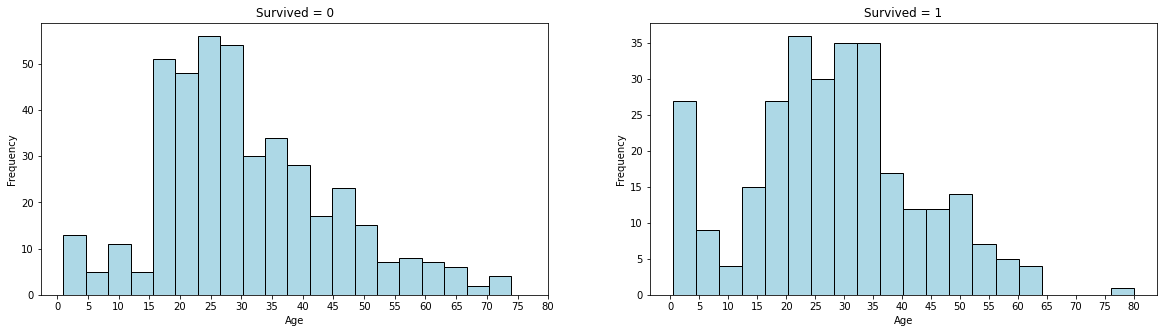

In [14]:
f,ax=plt.subplots(1,2,figsize=(20,5))
training_set[training_set['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='lightblue')
ax[0].set_title('Survived = 0')
ax[0].set_xlabel('Age')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
training_set[training_set['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='lightblue')
ax[1].set_title('Survived = 1')
ax[1].set_xlabel('Age')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

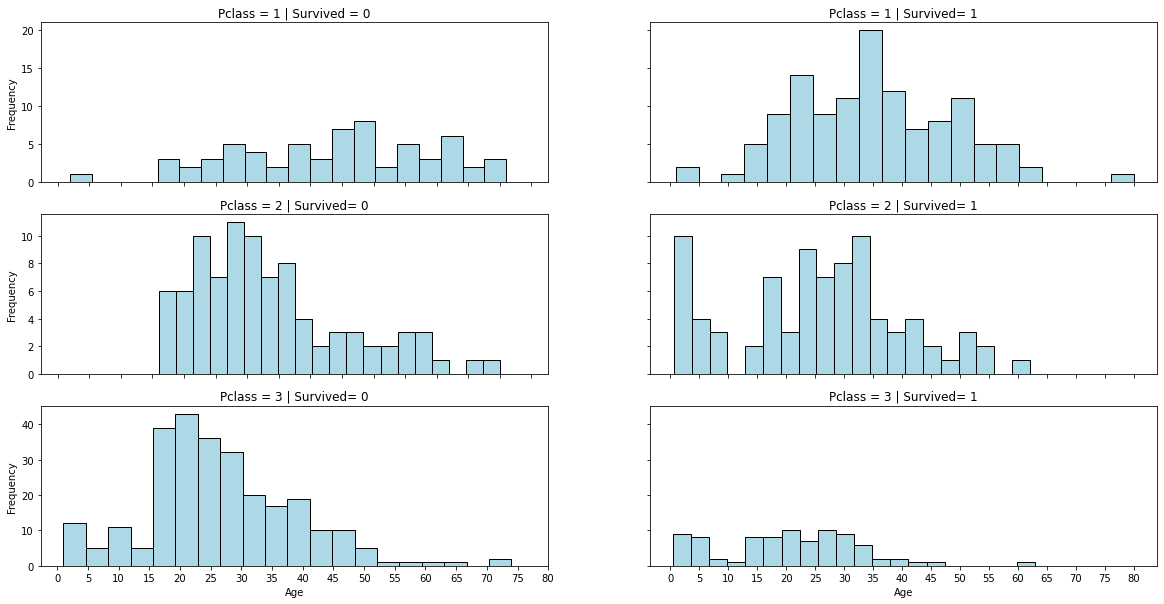

In [15]:

f,ax=plt.subplots(3, 2, sharex='col', sharey='row',figsize=(20,10))
training_set_filtered = training_set.loc[lambda training_set: training_set.Survived == 0].loc[lambda training_set: training_set.Pclass == 1]
training_set_filtered.Age.plot.hist(ax=ax[0,0],bins=20,edgecolor='black',color='lightblue')
ax[0,0].set_title('Pclass = 1 | Survived = 0')
ax[0,0].set_xlabel('Age')
x1=list(range(0,85,5))
ax[0,0].set_xticks(x1)
training_set_filtered = training_set.loc[lambda training_set: training_set.Survived == 1].loc[lambda training_set: training_set.Pclass == 1]
training_set_filtered.Age.plot.hist(ax=ax[0,1],bins=20,edgecolor='black',color='lightblue')
ax[0,1].set_title('Pclass = 1 | Survived= 1')
ax[0,1].set_xlabel('Age')
x2=list(range(0,85,5))
ax[0,1].set_xticks(x2)
training_set_filtered = training_set.loc[lambda training_set: training_set.Survived == 0].loc[lambda training_set: training_set.Pclass == 2]
training_set_filtered.Age.plot.hist(ax=ax[1,0],bins=20,edgecolor='black',color='lightblue')
ax[1,0].set_title('Pclass = 2 | Survived= 0')
ax[1,0].set_xlabel('Age')
x3=list(range(0,85,5))
ax[1,0].set_xticks(x3)
training_set_filtered = training_set.loc[lambda training_set: training_set.Survived == 1].loc[lambda training_set: training_set.Pclass == 2]
training_set_filtered.Age.plot.hist(ax=ax[1,1],bins=20,edgecolor='black',color='lightblue')
ax[1,1].set_title('Pclass = 2 | Survived= 1')
ax[1,1].set_xlabel('Age')
x4=list(range(0,85,5))
ax[1,1].set_xticks(x4)
training_set_filtered = training_set.loc[lambda training_set: training_set.Survived == 0].loc[lambda training_set: training_set.Pclass == 3]
training_set_filtered.Age.plot.hist(ax=ax[2,0],bins=20,edgecolor='black',color='lightblue')
ax[2,0].set_title('Pclass = 3 | Survived= 0')
ax[2,0].set_xlabel('Age')
x5=list(range(0,85,5))
ax[2,0].set_xticks(x5)
training_set_filtered = training_set.loc[lambda training_set: training_set.Survived == 1].loc[lambda training_set: training_set.Pclass == 3]
training_set_filtered.Age.plot.hist(ax=ax[2,1],bins=20,edgecolor='black',color='lightblue')
ax[2,1].set_title('Pclass = 3 | Survived= 1')
ax[2,1].set_xlabel('Age')
x6=list(range(0,85,5))
ax[2,1].set_xticks(x6) 
plt.show()

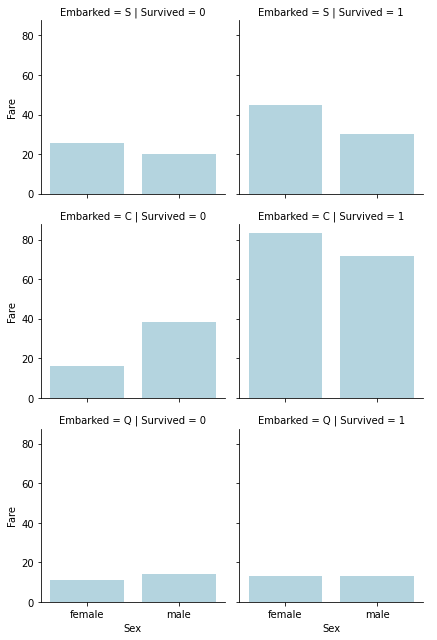

In [16]:
grid = sns.FacetGrid(training_set, row='Embarked', col='Survived', height=3, aspect=1)
grid.map(sns.barplot, 'Sex', 'Fare',  ci=None, order=['female','male'], color='lightblue')
grid.add_legend()

In [17]:
frequency = training_set['Ticket'].value_counts()
print(frequency)

347082         7
1601           7
CA. 2343       7
3101295        6
CA 2144        6
              ..
8475           1
2683           1
347081         1
W.E.P. 5734    1
368703         1
Name: Ticket, Length: 681, dtype: int64


In [18]:
frequency = test_set['Ticket'].value_counts()
print(frequency)

PC 17608     5
CA. 2343     4
113503       4
220845       3
16966        3
            ..
347070       1
A/5 1478     1
2696         1
694          1
AQ/4 3130    1
Name: Ticket, Length: 363, dtype: int64


In [19]:
training_set = training_set.drop(['Ticket'], axis=1)
test_set = test_set.drop(['Ticket'], axis=1)

In [20]:
training_set['Cabin'].isnull().sum()

687

In [21]:
test_set['Cabin'].isnull().sum()

327

In [22]:
combine = [training_set, test_set]

In [23]:
combine[0]['Cabin'].isnull().sum() + combine[1]['Cabin'].isnull().sum()

1014

In [24]:
training_set = training_set.drop(['Cabin'], axis=1)
test_set = test_set.drop(['Cabin'], axis=1)

In [25]:
combine = [training_set, test_set]

In [26]:
le = LabelEncoder();

In [27]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [28]:
for dataset in combine:
    dataset['Sex'] = le.fit_transform(dataset['Sex'])

In [29]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,S


In [30]:
mean = training_set['Age'].mean()
std = training_set['Age'].std()

print('The mean is : ', mean);
print('The Standard Deviation is : ', std);

def fill_missing_val(column_val):
    if np.isnan(column_val) == True: 
        column_val = np.random.randint(std, mean, 1)[0]
    else:
         column_val = column_val
    return column_val

combine[0]['Age'] = training_set['Age'].apply(fill_missing_val) 
combine[1]['Age'] = test_set['Age'].apply(fill_missing_val) 


The mean is :  29.69911764705882
The Standard Deviation is :  14.526497332334044


In [31]:
training_set.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,19.0,1,2,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,7.75,Q


In [32]:
training_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [33]:
training_set['Embarked'].mode()[0]

'S'

In [34]:
for column in training_set.columns:
    training_set['Embarked'].fillna(training_set['Embarked'].mode()[0], inplace=True)

In [35]:
training_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [36]:
test_set.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [37]:
for column in test_set.columns:
    test_set['Fare'].fillna(test_set['Fare'].mode()[0], inplace=True)

In [38]:
test_set.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [39]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S


In [40]:
def conv_fare_to_ordinal(x):
    if x > -(0.001) and x <= 7.91:
        return 0
    elif x > 7.91 and x <= 14.4542:
        return 1
    elif x > 14.4542 and x <= 31.0:
        return 2
    elif x > 31.0 and x <= 512.3292:
        return 3
    
combine[0]['Fare'] = training_set.Fare.apply(conv_fare_to_ordinal)
combine[1]['Fare'] = test_set.Fare.apply(conv_fare_to_ordinal)

In [41]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,3,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,3,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,1,S


In [42]:
training_set[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Fare', ascending=True)

,Fare,Survived
0,0,0.197309
1,1,0.303571
2,2,0.454955
3,3,0.581081


In [43]:
training_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,3,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,3,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,1,S
5,6,0,3,"Moran, Mr. James",1,27.0,0,0,1,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,3,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,2,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,1,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,2,C


In [44]:
test_set.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,0,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,1,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,1,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,1,S
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,1,S
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,0,Q
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,2,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,0,C
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,2,S


In [45]:
training_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [46]:
test_set.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [47]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [48]:
pd.crosstab(training_set['Title'], training_set['Sex'])

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [49]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
training_set[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [50]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [51]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,3,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,1,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,3,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,1,S,1


In [52]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
for dataset in combine:
    dataset['Age'] = dataset['Age'].astype(int)
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [53]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,0,0,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,3,1,3,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,1,0,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,3,0,3,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,1,0,1,1,1


In [54]:
training_set[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [55]:
training_set[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [56]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",1,34,0,0,0,2,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47,1,0,0,0,3,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,62,0,0,1,2,1,1,1
3,895,3,"Wirz, Mr. Albert",1,27,0,0,1,0,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22,1,1,1,0,3,3,0


In [57]:
#split the ages up into groups
training_set['AgeRange'] = pd.cut(training_set['Age'], 8)
training_set[['AgeRange', 'Survived']].groupby(['AgeRange'], as_index=False).mean().sort_values(by='AgeRange', ascending=True)  

,AgeRange,Survived
0,"(-0.08, 10.0]",0.593750
1,"(10.0, 20.0]",0.336538
2,"(20.0, 30.0]",0.348101
3,"(30.0, 40.0]",0.445161
4,"(40.0, 50.0]",0.392857
5,"(50.0, 60.0]",0.404762
6,"(60.0, 70.0]",0.222222
7,"(70.0, 80.0]",0.250000


In [58]:
def conv_age_to_ordinal(x):
    if x > -(0.08) and x <= 10.0:
        return 0
    elif x > 10.0 and x <= 20.0:
        return 1
    elif x > 20.0 and x <= 30.0:
        return 2
    elif x > 30.0 and x <= 40.0:
        return 3
    elif x > 40.0 and x <= 50.0:
        return 4
    elif x > 50.0 and x <= 60.0:
        return 5
    elif x > 60.0 and x <= 70.0:
        return 6
    elif x > 70.0 and x <= 80.0:
        return 7
    
combine[0]['Age'] = training_set.Age.apply(conv_age_to_ordinal)
combine[1]['Age'] = test_set.Age.apply(conv_age_to_ordinal)
dataset['Age'] = dataset['Age'].astype(int)

In [59]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",1,2,1,0,0,0,1,2,0,"(20.0, 30.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,3,1,3,2,0,"(30.0, 40.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,0,1,0,2,1,1,"(20.0, 30.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,3,0,3,2,0,"(30.0, 40.0]"
4,5,0,3,"Allen, Mr. William Henry",1,3,0,0,1,0,1,1,1,"(30.0, 40.0]"


In [60]:
training_set = training_set.drop(['AgeRange','Name','Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [training_set, test_set]

In [61]:
training_set.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,1,2,0,0,1,0
1,2,1,1,0,3,3,1,3,0
2,3,1,3,0,2,1,0,2,1
3,4,1,1,0,3,3,0,3,0
4,5,0,3,1,3,1,0,1,1


In [62]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",1,3,0,0,0,2,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,4,1,0,0,0,3,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,6,0,0,1,2,1,1,1
3,895,3,"Wirz, Mr. Albert",1,2,0,0,1,0,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,2,1,1,1,0,3,3,0


In [63]:
X_train = training_set.drop(['Survived','PassengerId',], axis=1)
X_train.shape

(891, 7)

In [64]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,1,2,0,0,1,0
1,1,0,3,3,1,3,0
2,3,0,2,1,0,2,1
3,1,0,3,3,0,3,0
4,3,1,3,1,0,1,1


In [65]:
Y_train = training_set["Survived"]
Y_train.shape

(891,)

In [66]:
X_test  = test_set.drop(['PassengerId','Name','Parch', 'SibSp', 'FamilySize'], axis=1)
X_test.shape

(418, 7)

# Performing Feature Selection

In [67]:
train_new=SelectKBest(score_func=f_classif,k=7).fit(X_train,Y_train)

In [68]:
train_new_scores = pd.DataFrame(train_new.scores_)
train_new_columns = pd.DataFrame(X_train.columns)
feature_scores = pd.concat([train_new_columns, train_new_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  
print(feature_scores.nlargest(7,'Score')) 

  Feature_Name       Score
1          Sex  372.405724
5        Title  177.283027
0       Pclass  115.031272
3         Fare   87.509411
6      IsAlone   38.353651
4     Embarked   10.259355
2          Age    0.789143


### Top 4 features by using Statistical Method - SelectKBest are: Sex,Title, Pclass, Fare

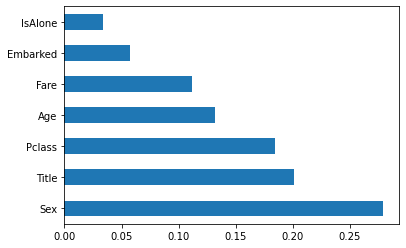

In [69]:
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

### Top 4 features from Feature importance method - Extra Tree Classifer are: Sex, Pclass, Title, Age

In [70]:
training_set.corr(method = 'pearson')

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.028789,-0.022998,-0.030467,0.003878,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.029781,0.299357,0.106811,0.407753,-0.203367
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.348150,-0.634271,0.045702,-0.173929,0.135207
Sex,0.042939,-0.543351,0.131900,1.000000,0.060412,-0.243613,-0.116569,-0.502713,0.303646
Age,0.028789,-0.029781,-0.348150,0.060412,1.000000,0.119491,-0.082599,-0.044003,0.119559
Fare,-0.022998,0.299357,-0.634271,-0.243613,0.119491,1.000000,-0.098161,0.339808,-0.560279
Embarked,-0.030467,0.106811,0.045702,-0.116569,-0.082599,-0.098161,1.000000,0.045400,0.017807
Title,0.003878,0.407753,-0.173929,-0.502713,-0.044003,0.339808,0.045400,1.000000,-0.405813
IsAlone,0.057462,-0.203367,0.135207,0.303646,0.119559,-0.560279,0.017807,-0.405813,1.000000


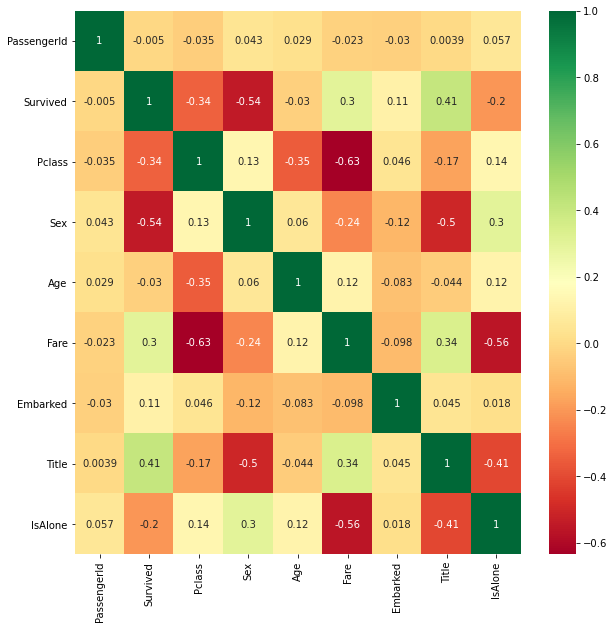

In [71]:
corrmat = training_set.corr(method = 'pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

g=sns.heatmap(training_set[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Top 4 features from Correlation Matrix are: Sex,Title, Pclass, Fare

In [72]:
model = LogisticRegression(max_iter=1000)
rfe = RFE(model)
fit = rfe.fit(X_train, Y_train)
print("Num Features: ",fit.n_features_)
print("Selected Features: ",fit.support_)
print("Feature Ranking: ",fit.ranking_)
print(X_train.head())

Num Features:  3
Selected Features:  [ True  True False False False  True False]
Feature Ranking:  [1 1 3 5 2 1 4]
   Pclass  Sex  Age  Fare  Embarked  Title  IsAlone
0       3    1    2     0         0      1        0
1       1    0    3     3         1      3        0
2       3    0    2     1         0      2        1
3       1    0    3     3         0      3        0
4       3    1    3     1         0      1        1


### Top 3 features for RFE are: Pclass, Sex and Title

## Final variable that are considered to train the model is Sex, Title, Pclass and Fare

In [73]:
X_train = X_train.drop(['Age','Embarked','IsAlone'], axis=1)
Y_train = training_set["Survived"]
X_test  = X_test.drop(['Age','Embarked','IsAlone'], axis=1)
X_train.shape, Y_train.shape, X_test.shape

((891, 4), (891,), (418, 4))

In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pclass  891 non-null    int64
 1   Sex     891 non-null    int32
 2   Fare    891 non-null    int64
 3   Title   891 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 24.5 KB


In [75]:
X_test.head()

,Pclass,Sex,Fare,Title
0,3,1,0,1
1,3,0,0,3
2,2,1,1,1
3,3,1,1,1
4,3,0,1,3


In [76]:
def get_gini_impurity(survived_count, total_count):
    survival_rate = survived_count/total_count
    not_survival_rate = (1 - survival_rate)
    gini_impurity = 1 - (survival_rate * survival_rate) - (not_survival_rate * not_survival_rate)
    return gini_impurity

In [77]:
# Calculating Gini Impurity of start node
gini_impurity_start_node = get_gini_impurity(342, 891)
gini_impurity_start_node

0.47301295786144276

In [78]:
# Calculating Gini Impurity Sex=male 
gini_impurity_men = get_gini_impurity(109, 577)
gini_impurity_men

0.3064437162277842

In [79]:
# Calculating Gini Impurity Sex=female 
gini_impurity_female = get_gini_impurity(233, 314)
gini_impurity_female

0.3828350034484158

In [80]:
#Calculating information gain for Sex node
weighted_men = 577/891
weighted_female = 314/891
information_gain_sex = gini_impurity_start_node - (weighted_men*gini_impurity_men + weighted_female*gini_impurity_female)
information_gain_sex

0.13964795747285236

In [81]:
# Calculating Gini Impurity Title = Mr
gini_impurity_mr = get_gini_impurity(81, 517)
gini_impurity_mr

0.2642532988637767

In [82]:
# Calculating Gini Impurity Title = Other
gini_impurity_other = get_gini_impurity(261, 374)
gini_impurity_other

0.42170207898424317

In [83]:
#Calculating information gain for title node
weighted_mr_title = 517/891
weighted_other_title = 374/891
information_gain_title = gini_impurity_start_node - (weighted_mr_title*gini_impurity_mr + weighted_other_title*gini_impurity_other)
information_gain_title

0.14267004758907526

In [84]:
np.random.seed(42)

#### Based on Information Gain of both Sex and Title, Title feature is slightly better than Sex in reducing Gini impurity. 
##### So, we will use Title for our best split to start with the tree.
#### Similarly, need to calculate at every node to make the best split

# Plotting the Decision Tree Graph

In [85]:
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

82.27


In [86]:
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
Title,0.702010
Pclass,0.213687
Fare,0.076276
Sex,0.008026


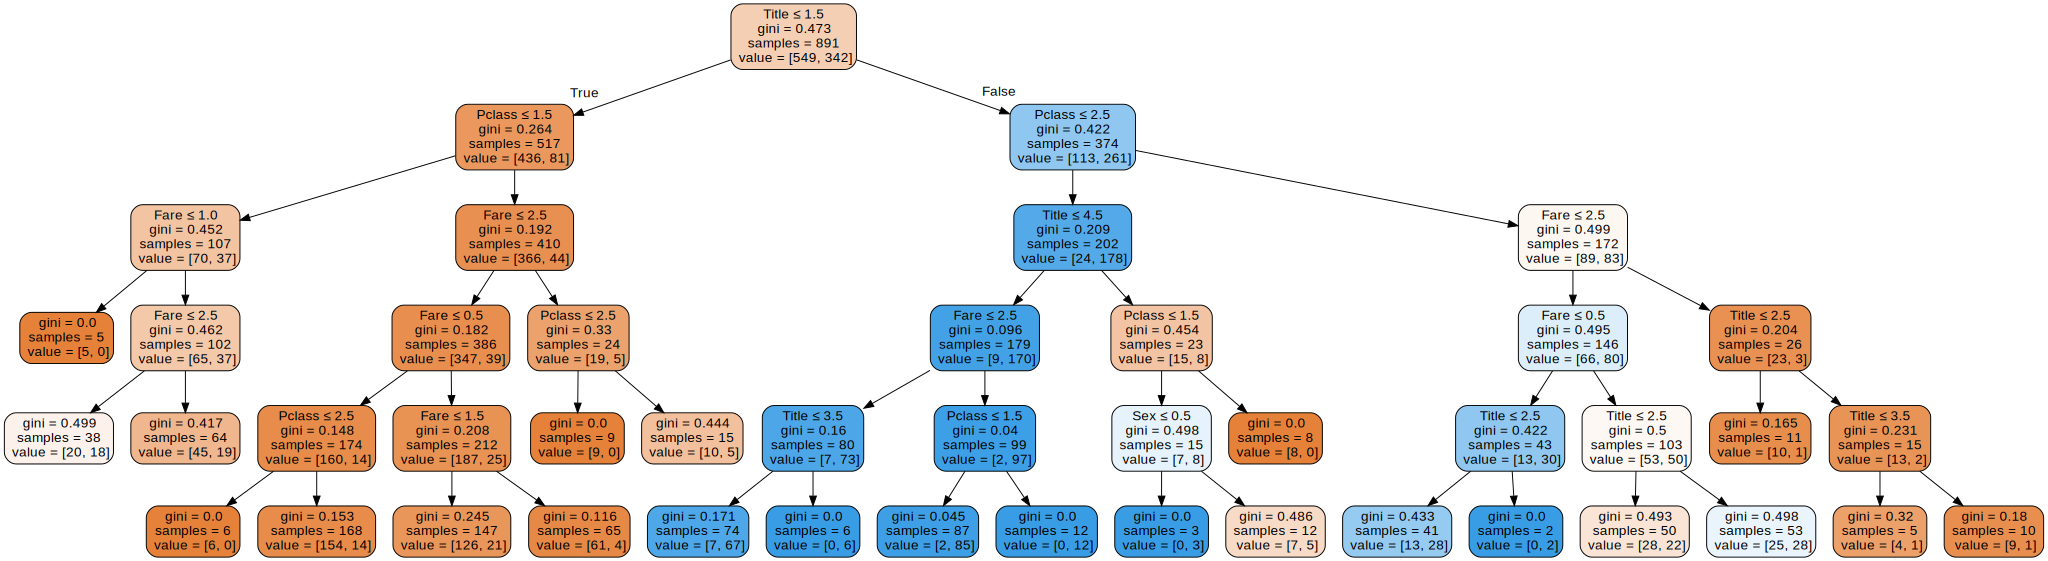

In [87]:
dot_data = tree.export_graphviz(decision_tree, 
                                out_file=None,
                                filled=True, 
                                rounded=True,  
                                special_characters=True,
                               feature_names = X_train.columns) 
graph = graphviz.Source(dot_data)
graph

## Applying the five-fold cross validation on the decision tree learning algorithm

In [88]:
acc_decision_tree_after_5FoldValidation = round(np.mean(cross_val_score(decision_tree, X_train, Y_train,cv=5)) * 100, 2)
acc_decision_tree_after_5FoldValidation

79.57

# Calculating RandomForest

In [89]:
np.random.seed(42)
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

82.49

## Applying the five-fold cross validation on the random forest learning algorithm

In [90]:
acc_random_forest_after_5FoldValidation = np.mean(cross_val_score(random_forest, X_train, Y_train, cv=5))
acc_random_forest_after_5FoldValidation = round(acc_random_forest_after_5FoldValidation * 100, 2)
acc_random_forest_after_5FoldValidation

79.68

# Trying other algorithm, to check which one gives better accuracy

In [91]:
 #Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

77.89

In [92]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_predSVM = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

81.93

In [93]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_predKNN = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

74.07

In [94]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.78

In [95]:
# Linear SVC

linear_svc = LinearSVC(max_iter=10000)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

78.0

In [96]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.45

In [97]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,82.49
7,Decision Tree,82.27
0,Support Vector Machines,81.93
5,Stochastic Gradient Decent,78.45
6,Linear SVC,78.00
2,Logistic Regression,77.89
4,Naive Bayes,77.78
1,KNN,74.07
